## Multiple Regression

## Bike Sharing Assignment 
#### By M.PHANEESHWAR

## Steps of Execution

- Reading, Understanding and visualising the data
- Preparing the data for modeling (test-train, rescaling etc)
- Training the model
- Residual Analysis
- Predictions and Evaluation on the set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 1: Data Understanding, Cleaning, Visualization

In [3]:
df = pd.read_csv('Bike_share.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.shape

(730, 16)

In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### As the casual and Registered variables are of no use as the target variabl is cnt hence we remove them


In [10]:
df.drop(['casual', 'registered'],inplace = True,axis = 1)

##### dteday does not give much information as we have seprate year, and month column. hence this variable can be removed

In [11]:
df.drop('dteday',inplace = True, axis = 1)

##### instant have values similar to index column

In [12]:
df.drop('instant',inplace = True,axis = 1)

##### Now we need to determine few catagorical variables that are in numeric form, such variables need to be converted as Dummy variables

In [13]:
df.weekday = df.weekday.map({0 : 'weekday_0',1 : 'weekday_1',2 : 'weekday_2',3 : 'weekday_3',4 : 'weekday_4',5 : 'weekday_5',6 : 'weekday_6'})

In [14]:
df.season = df.season.map({1:'spring', 2: 'summer', 3: 'fall', 4:'winter'})

###### When we look into weathersit it is observerd they are numbered as 1,2,3,4: we are going convert those numbers into string and then into dummy variables

In [15]:
df.weathersit = df.weathersit.map({1:'weather_Cond_1', 2: 'weather_Cond_2', 3: 'weather_Cond_3', 4:'weather_Cond_4'})

###### month is coverted from numeric numbers into categorical and later we could create dummy variables

In [16]:
df.mnth = df.mnth.map({1 : 'Jan', 2: 'Feb', 3 : 'Mar', 4: 'Apr', 5 : 'May', 6: 'Jun', 7 : 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' })

###### Setting up the precision value upto two decimal points

In [17]:
df.temp = df.temp.apply(lambda x : round(x,2))
df.atemp = df.atemp.apply(lambda x : round(x,2))
df.hum = df.hum.apply(lambda x : round(x,2))
df.windspeed = df.windspeed.apply(lambda x : round(x,2))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


###### Lets look into pairplot of temp,atemp,hum,windspeed,cnt

In [19]:
Cols = ['temp','atemp','hum','windspeed','cnt']

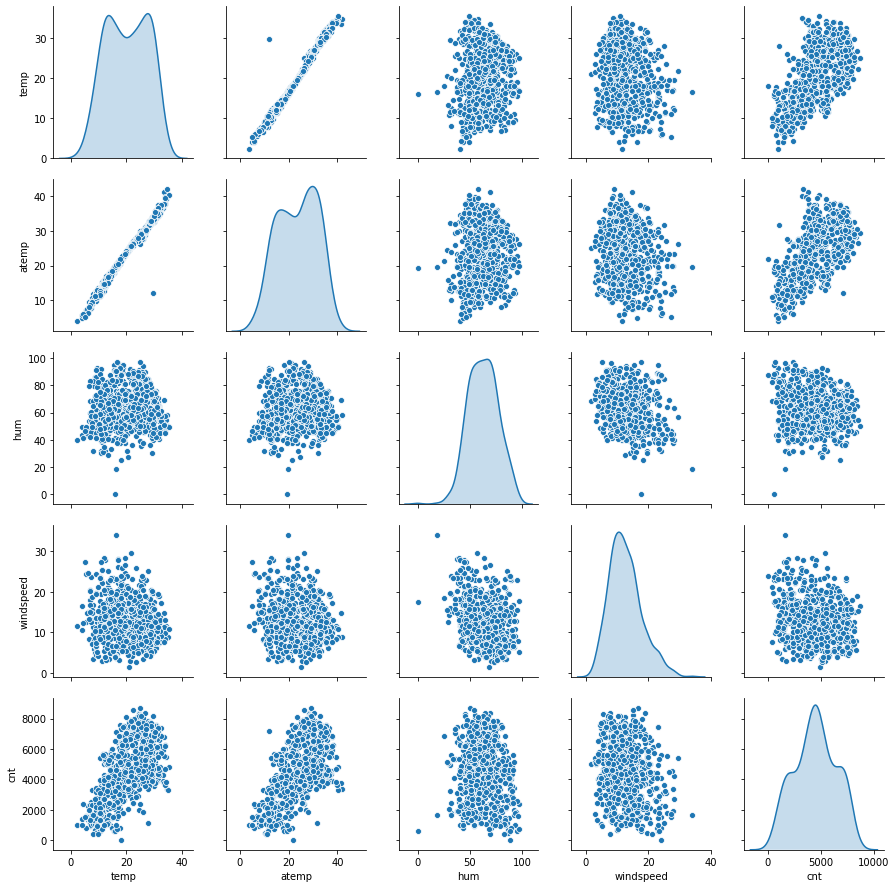

In [20]:
sns.pairplot(df[Cols],diag_kind = 'kde')
plt.show()

##### Observation : 
- from the above pairplot it is observed that there is high correlation that exists between temp and atemp variables, hence one of the two can be eliminated 
- cnt has a good correlation with temp variable


###### Eliminate the atemp variable because it has very high correlation with temp variable

In [21]:
df.drop('atemp', inplace = True, axis = 1)

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,weekday_6,0,weather_Cond_2,14.11,80.58,10.75,985
1,spring,0,Jan,0,weekday_0,0,weather_Cond_2,14.90,69.61,16.65,801
2,spring,0,Jan,0,weekday_1,1,weather_Cond_1,8.05,43.73,16.64,1349
3,spring,0,Jan,0,weekday_2,1,weather_Cond_1,8.20,59.04,10.74,1562
4,spring,0,Jan,0,weekday_3,1,weather_Cond_1,9.31,43.70,12.52,1600


###### Lets look into the visualization of Categorical Variables by plotting Boxplots, Cat_variables vs cnt

In [23]:
Cols_Cat = ['season','mnth','weekday','weathersit']

###### Box Plot for Columns [ Sesaon, mnth, weekday, weathersit ] vs cnt

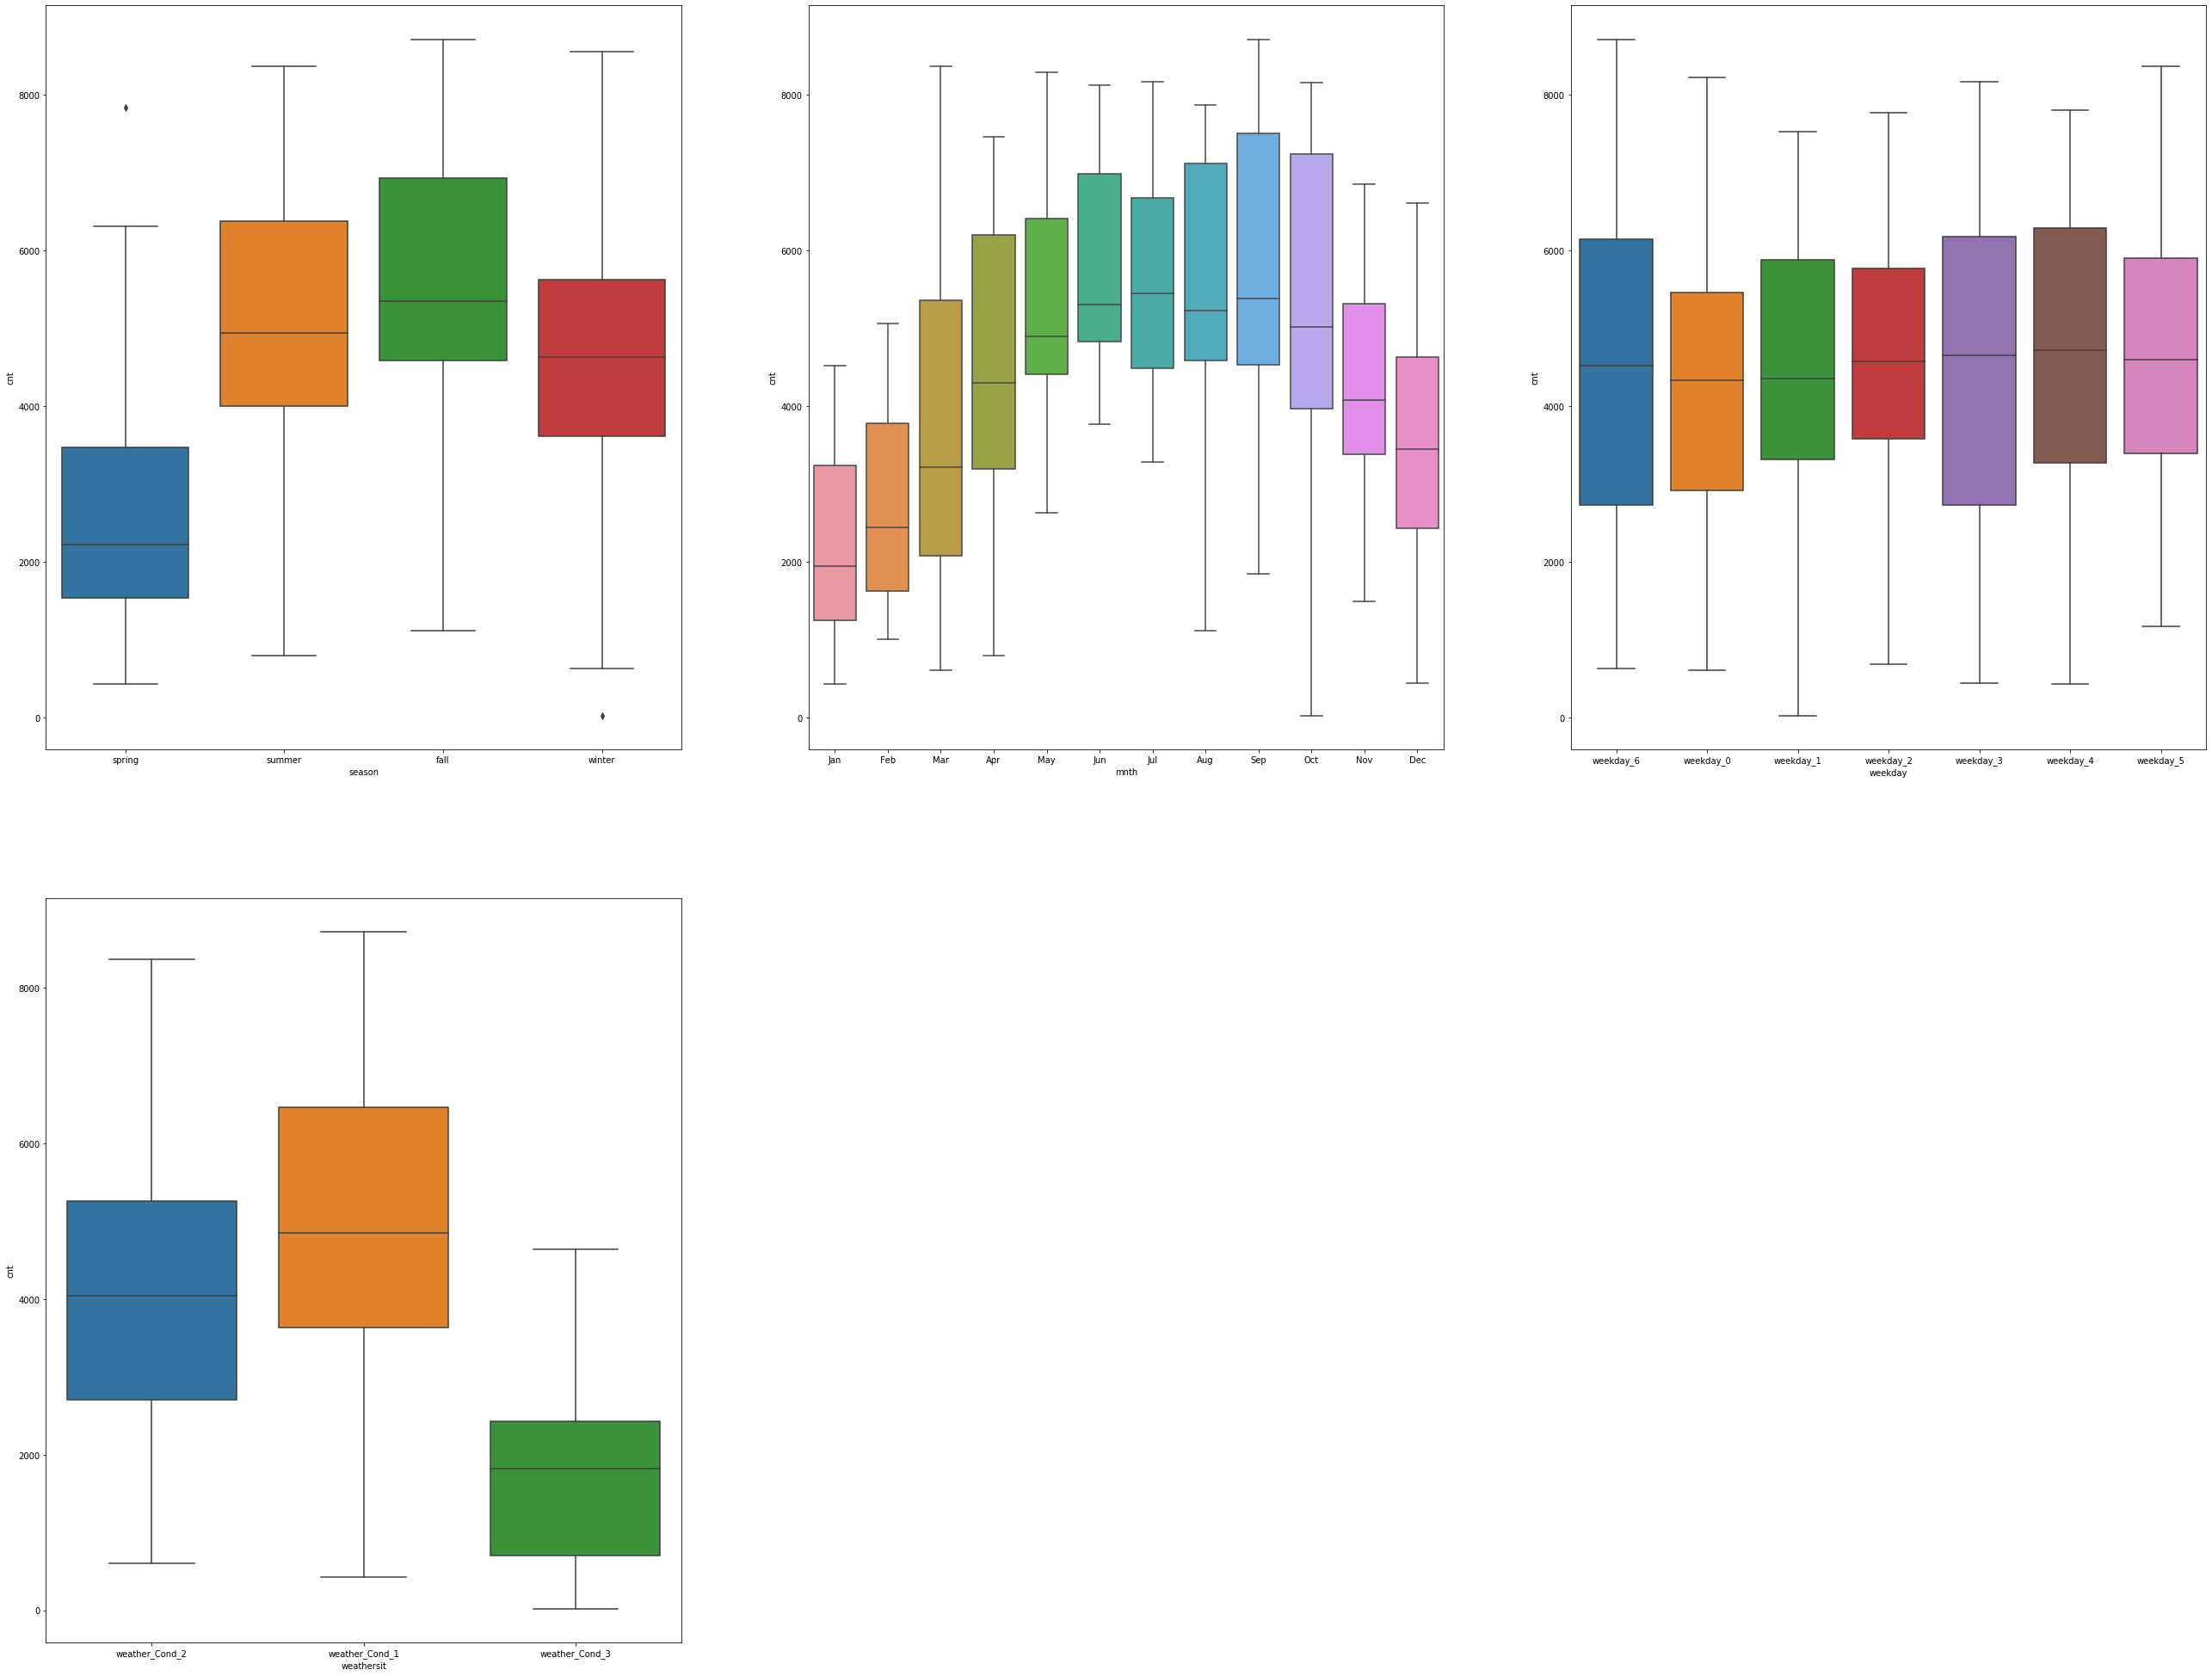

In [24]:
plt.subplots(figsize = (45,35))
plt.subplot(2,3,1)
sns.boxplot(x = Cols_Cat[0], y = 'cnt', data = df )
plt.subplot(2,3,2)
sns.boxplot(x = Cols_Cat[1], y = 'cnt', data = df )
plt.subplot(2,3,3)
sns.boxplot(x = Cols_Cat[2], y = 'cnt', data = df )
plt.subplot(2,3,4)
sns.boxplot(x = Cols_Cat[3], y = 'cnt', data = df )
plt.show()


In [25]:
def add_value_labels_plots(ax,size,spacing=5):
    
    plt.yticks(fontsize=size)
    plt.xticks(fontsize=size)
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',fontsize=size,                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


##### Lets look into to Bar plots, Catogorical Variables vs Cnt

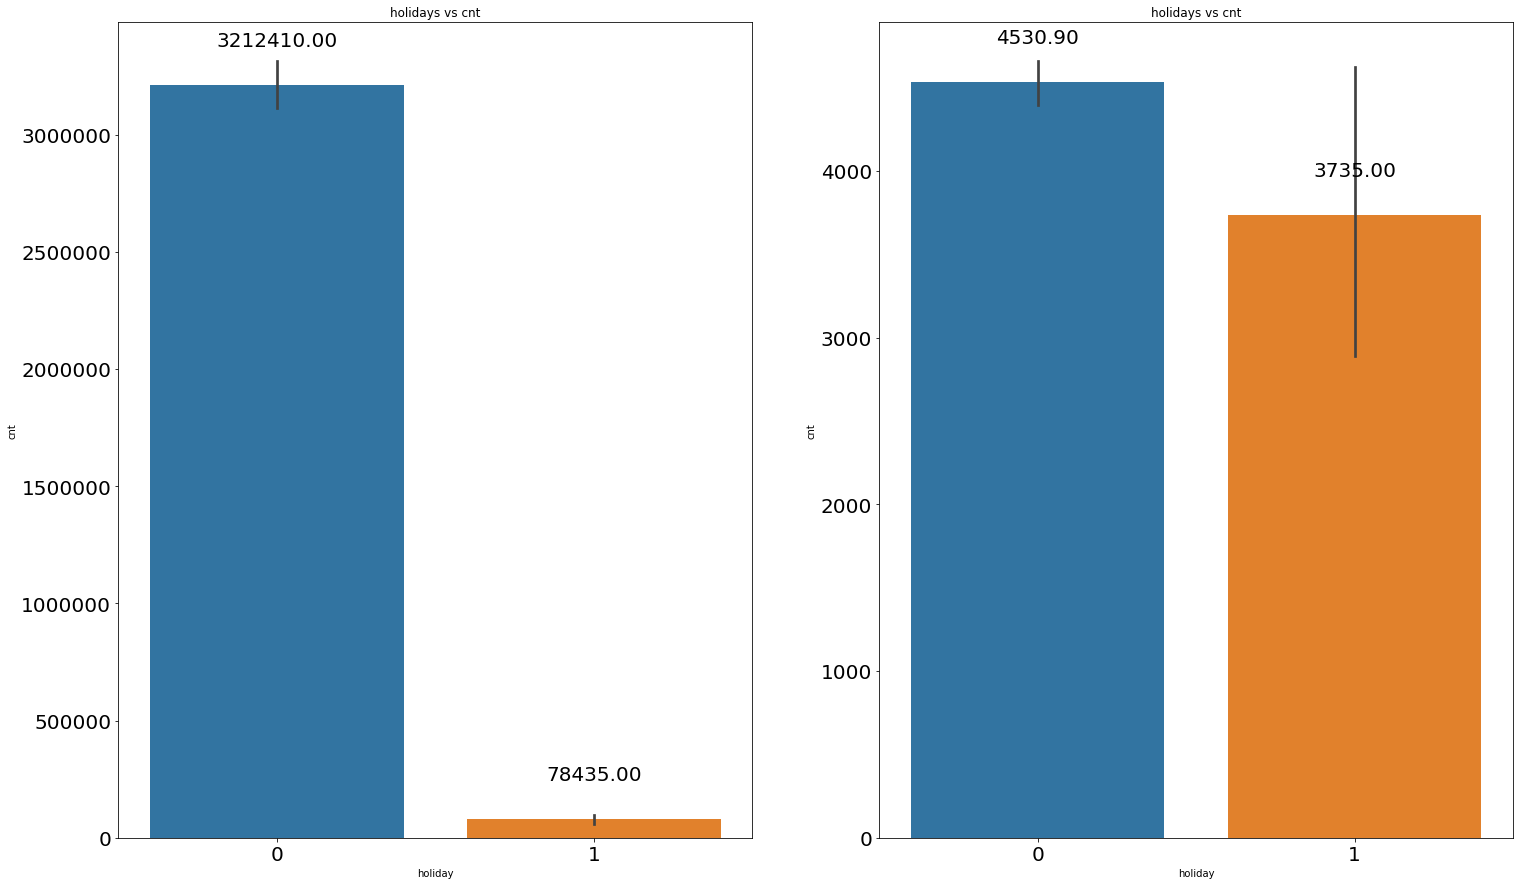

In [26]:
# holiday vs cnt
plt.subplots(figsize = (25,15))

plt.subplot(1,2,1)
ax = sns.barplot(x = df.holiday,y = df.cnt,estimator = np.sum)
add_value_labels_plots(ax,20,spacing=35)
plt.title('holidays vs cnt')

plt.subplot(1,2,2)
ax = sns.barplot(x = df.holiday,y = df.cnt,estimator = np.mean)
add_value_labels_plots(ax,20,spacing=35)
plt.title('holidays vs cnt')

plt.show()

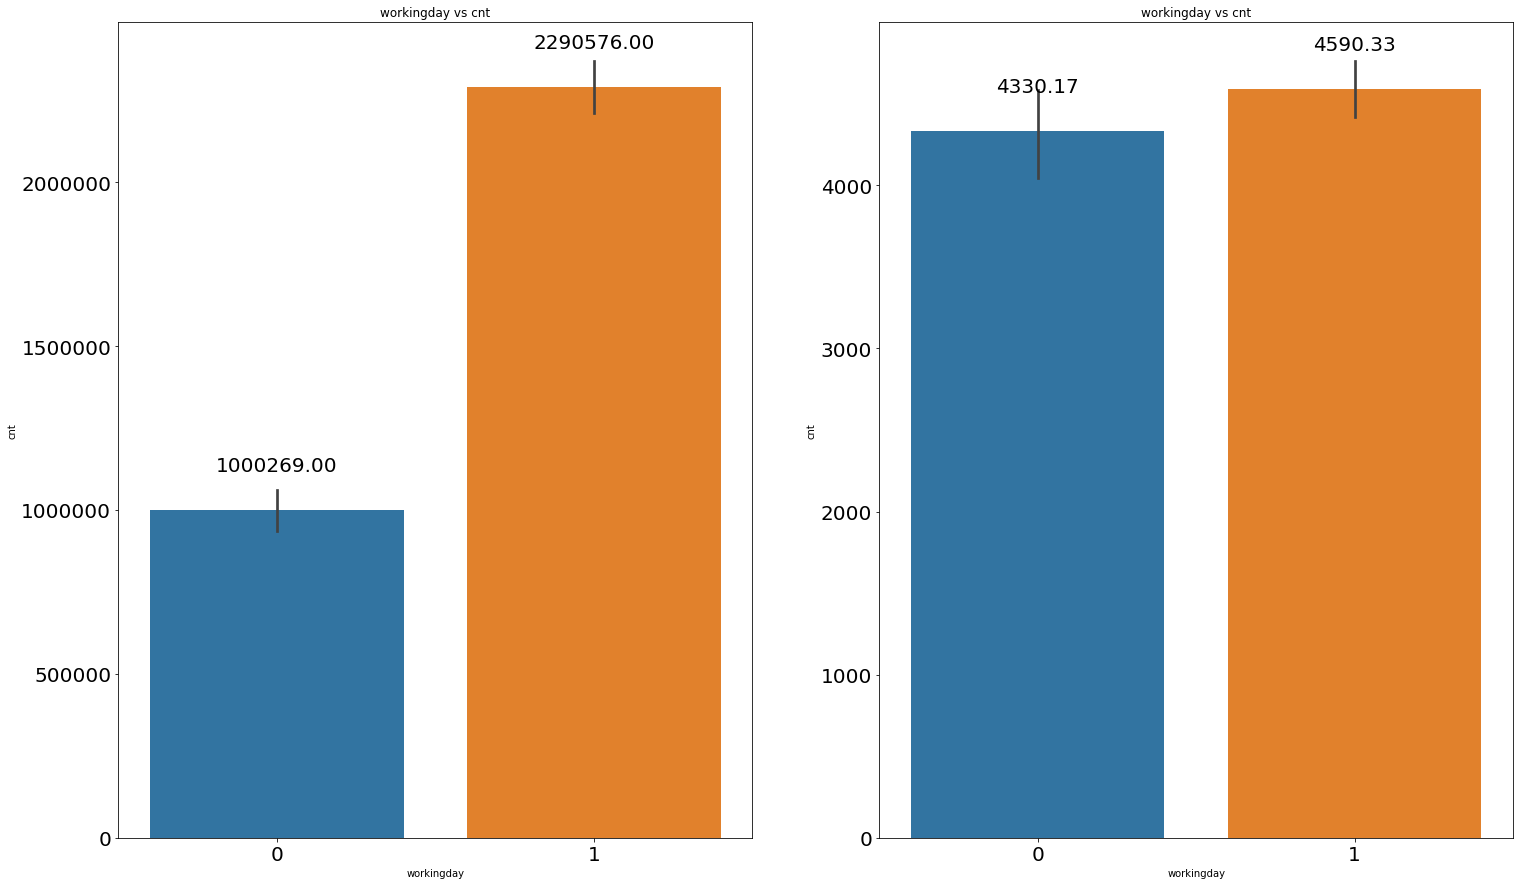

In [27]:
# workingday vs cnt
plt.subplots(figsize = (25,15))
plt.subplot(1,2,1)
ax = sns.barplot(x = df.workingday,y = df.cnt,estimator = np.sum)
add_value_labels_plots(ax,20,spacing=35)
plt.title('workingday vs cnt')

plt.subplot(1,2,2)
ax = sns.barplot(x = df.workingday,y = df.cnt,estimator = np.mean)
add_value_labels_plots(ax,20,spacing=35)
plt.title('workingday vs cnt')
plt.show()

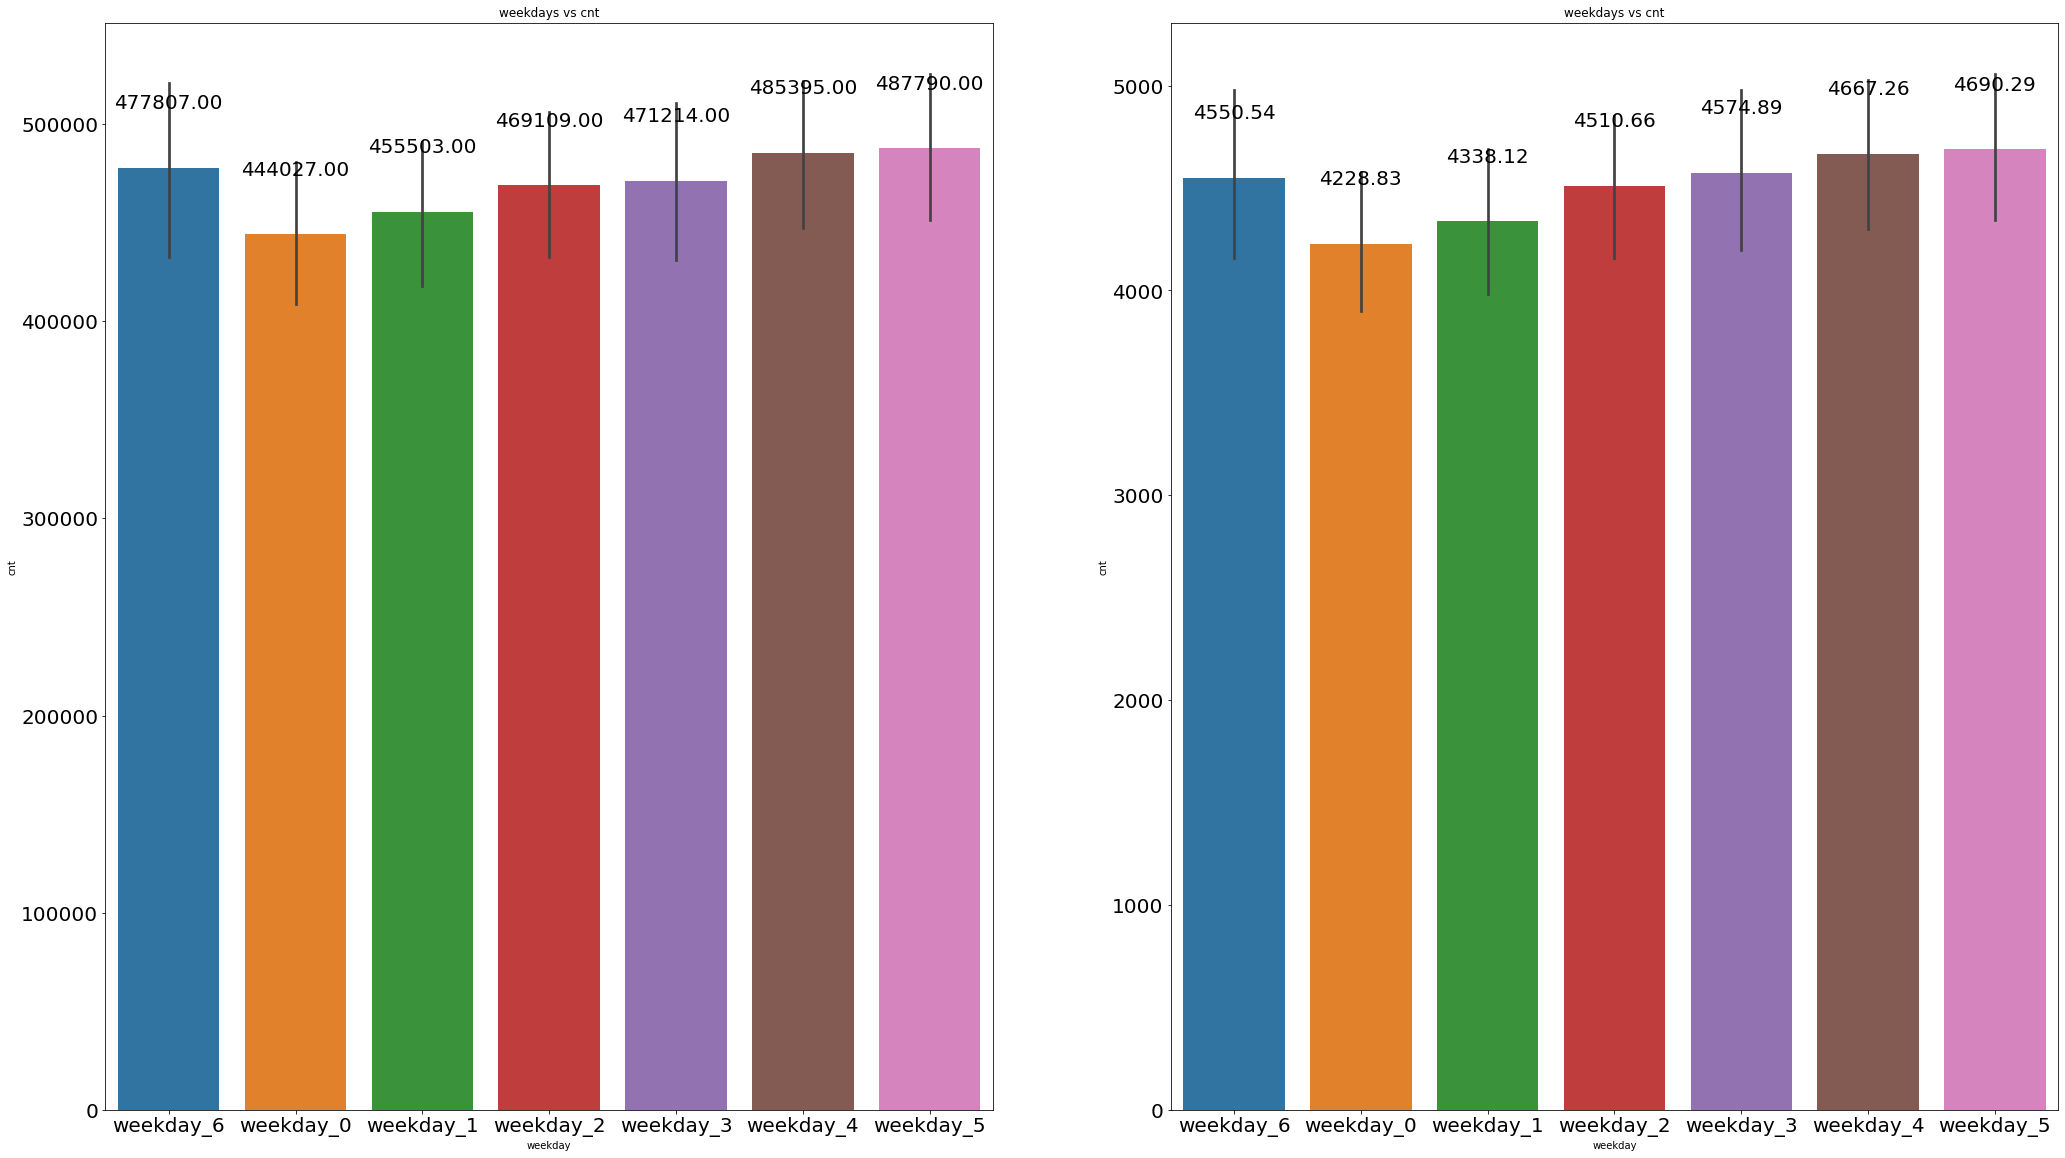

In [28]:
# weekdays vs cnt
plt.subplots(figsize = (35,20))
plt.subplot(1,2,1)
ax = sns.barplot(x = df.weekday,y = df.cnt,estimator = np.sum)
add_value_labels_plots(ax,20,spacing=55)
plt.title('weekdays vs cnt')

plt.subplot(1,2,2)
ax = sns.barplot(x = df.weekday,y = df.cnt,estimator = np.mean)
add_value_labels_plots(ax,20,spacing=55)
plt.title('weekdays vs cnt')
plt.show()

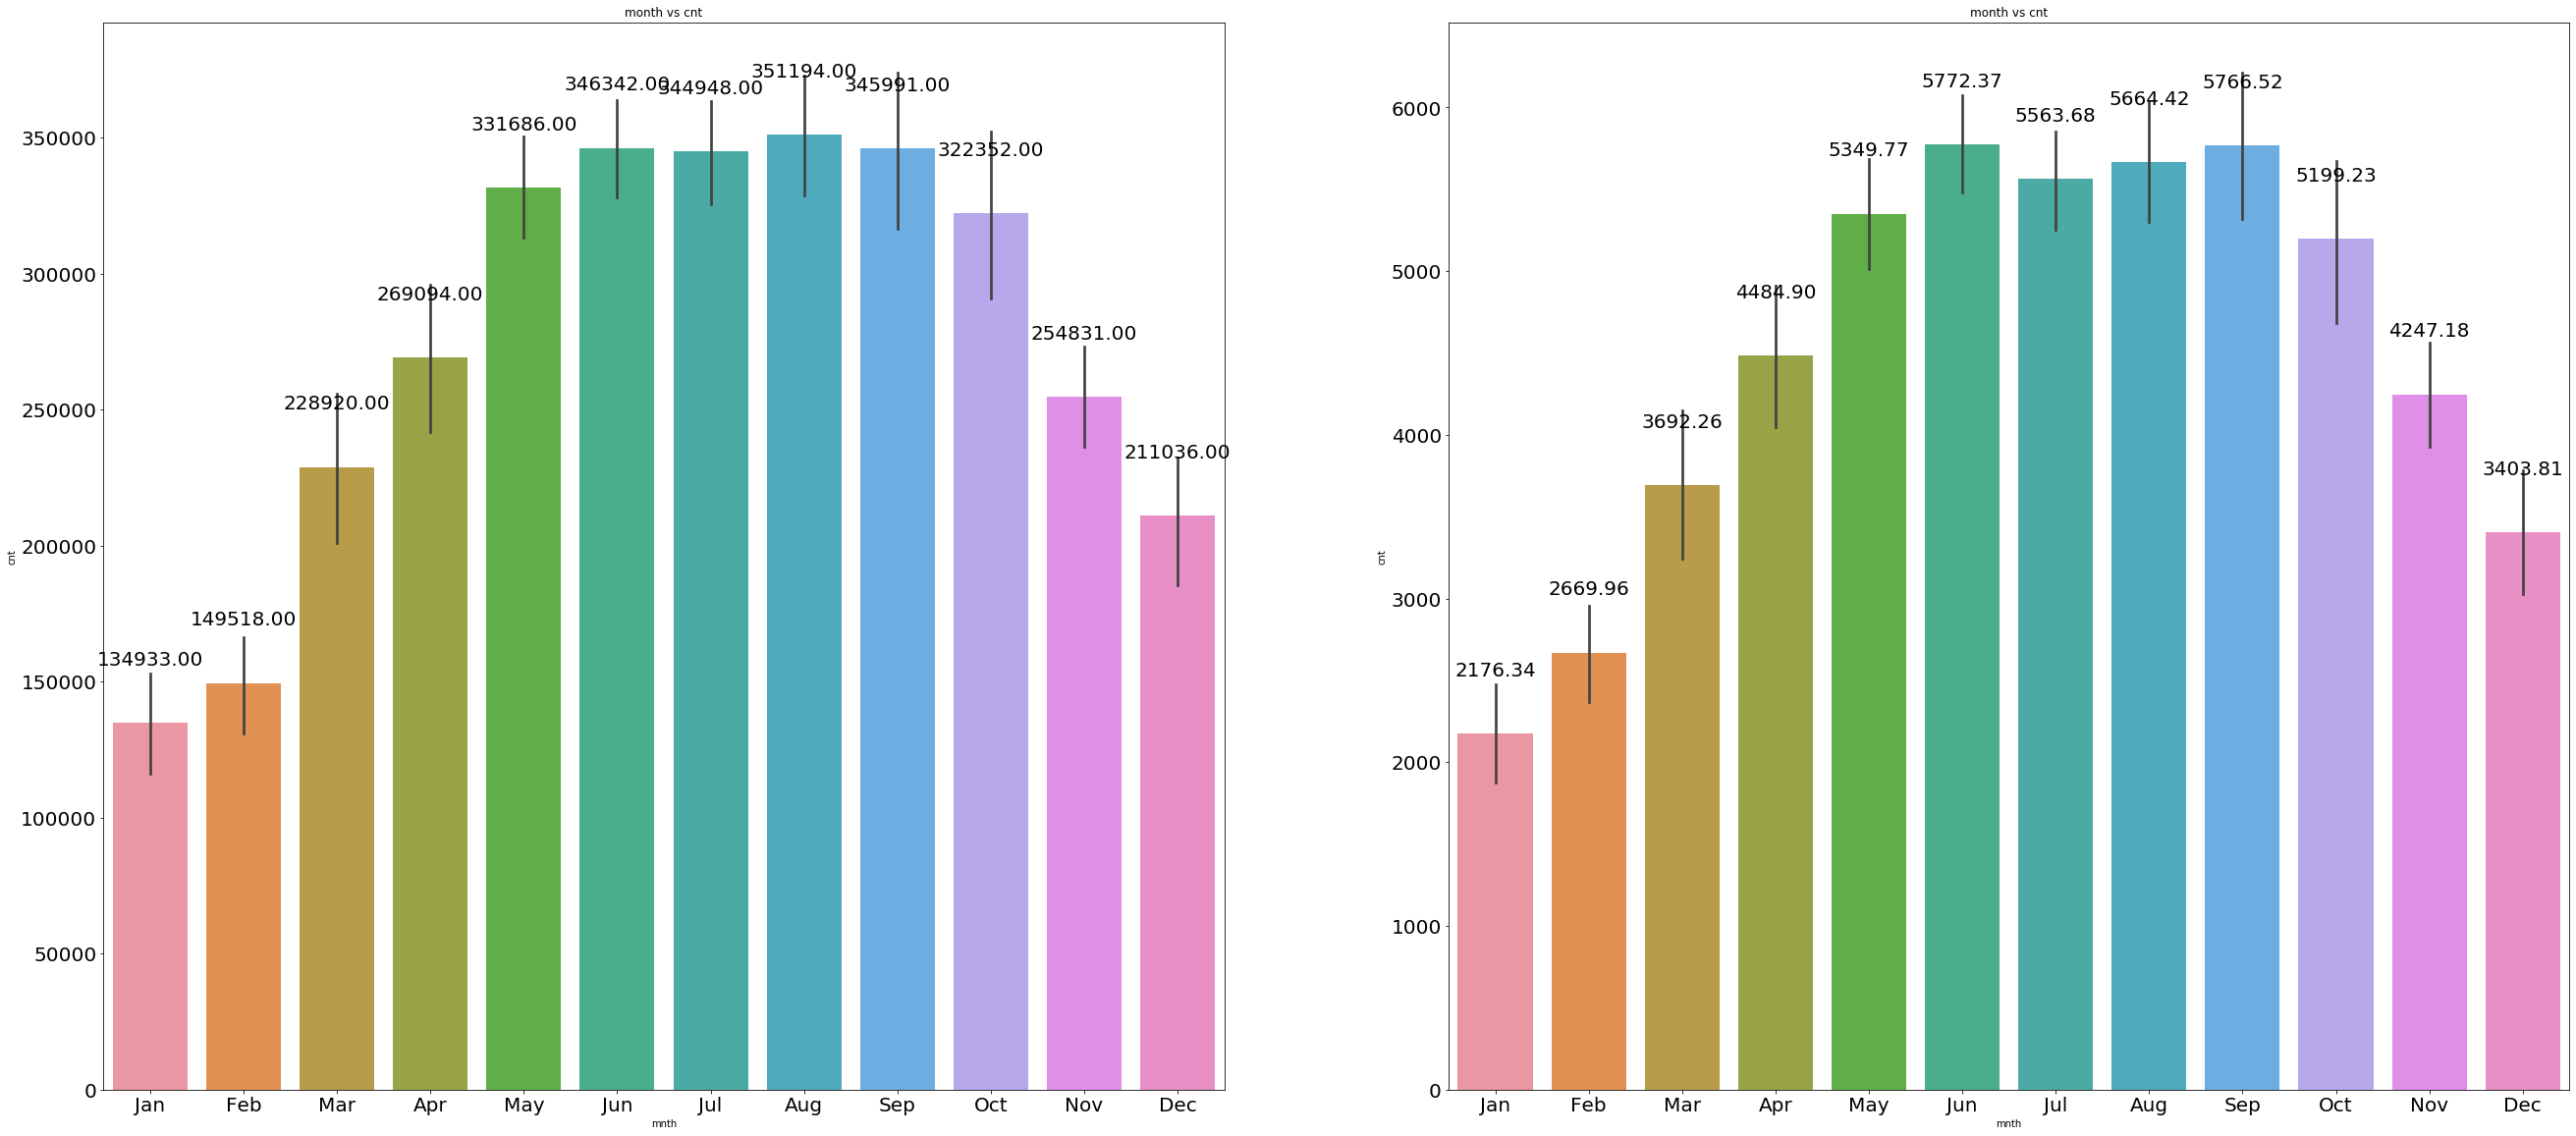

In [29]:
# mnth vs cnt
plt.subplots(figsize = (45,20))
plt.subplot(1,2,1)
ax = sns.barplot(x = df.mnth,y = df.cnt,estimator = np.sum)
add_value_labels_plots(ax,20,spacing=55)
plt.title('month vs cnt')

plt.subplot(1,2,2)
ax = sns.barplot(x = df.mnth,y = df.cnt,estimator = np.mean)
add_value_labels_plots(ax,20,spacing=55)
plt.title('month vs cnt')

plt.show()

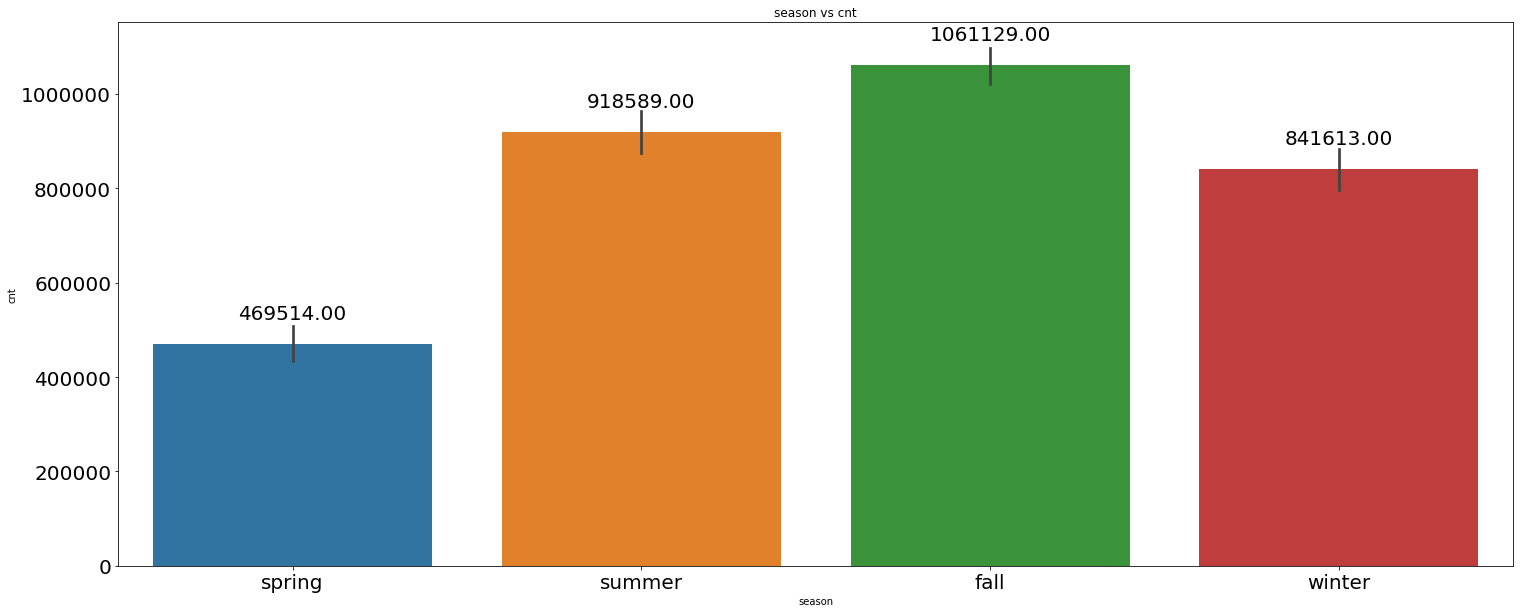

In [30]:
# season vs cnt
plt.subplots(figsize = (25,10))
ax = sns.barplot(x = df.season,y = df.cnt,estimator = np.sum)
add_value_labels_plots(ax,20,spacing=21)
plt.title('season vs cnt')
plt.show()

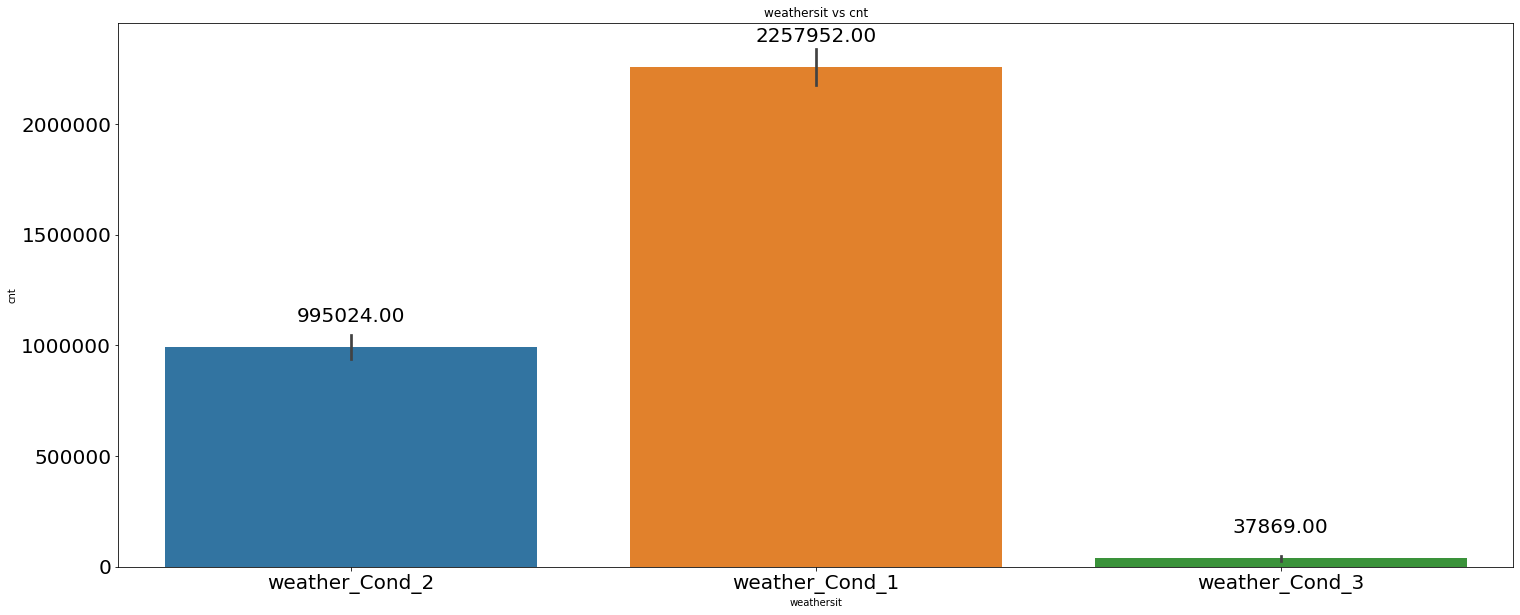

In [31]:
# weathersit vs cnt
plt.subplots(figsize = (25,10))
ax = sns.barplot(x = df.weathersit,y = df.cnt,estimator = np.sum)
add_value_labels_plots(ax,20,spacing=21)
plt.title('weathersit vs cnt')
plt.show()

### Observations :

###### Season : 
- Almost 31% of users prefer riding during fall with a mean equal to 5644 bookings. And about 26% people prefer winter, while 28% of custormers prefer summer for the ride. This is variable can be a good predictor

###### Holiday : 
- 98% of people prefer bikes when it is not a holiday. So this indicates that Holiday variable is not that important parameter for prdictions

###### WorkingDay : 
- 70% of people prefer bikes on working day, hence this indicates that working day feature is important for predictions

###### Weekdays : 
- It is observed that there is not much diffrence in number of custormers in each day.

###### Months :
- May to Oct has high number of Custormers opting bikes, nearly around 10% of custormers

###### Weather Sit :
- 69% of custormers prefer riding bikes when the weather is clear, few clouds, or Partly cloudy (weather_Cond_1) , while remaining 30.2% of people prefer Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (weather_Cond_2), barley 0.011 % people prefer riding bikes with weather_Cond_3. This also indicates good inference in predicting variables 

#### Lets Create Dummy Variables for Categorical terms in the dataset

In [32]:
# Since the dummy variables are created for weekday, hence lets delete weekday in the data frame
status1 = pd.get_dummies(df.weekday,drop_first = True)
df = pd.concat([df,status1],axis = 1)
df.drop('weekday',inplace = True,axis = 1)
df.head()

,season,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,spring,0,Jan,0,0,weather_Cond_2,14.11,80.58,10.75,985,0,0,0,0,0,1
1,spring,0,Jan,0,0,weather_Cond_2,14.90,69.61,16.65,801,0,0,0,0,0,0
2,spring,0,Jan,0,1,weather_Cond_1,8.05,43.73,16.64,1349,1,0,0,0,0,0
3,spring,0,Jan,0,1,weather_Cond_1,8.20,59.04,10.74,1562,0,1,0,0,0,0
4,spring,0,Jan,0,1,weather_Cond_1,9.31,43.70,12.52,1600,0,0,1,0,0,0


In [33]:
# Since the dummy variables are created for season, hence lets delete season in the data frame
status2 = pd.get_dummies(df.season, drop_first = True)
#status2.drop('spring',inplace = True, axis = 1)
df = pd.concat([df,status2], axis = 1)
df.drop('season',inplace = True, axis = 1)
df.head()

,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,spring,summer,winter
0,0,Jan,0,0,weather_Cond_2,14.11,80.58,10.75,985,0,0,0,0,0,1,1,0,0
1,0,Jan,0,0,weather_Cond_2,14.90,69.61,16.65,801,0,0,0,0,0,0,1,0,0
2,0,Jan,0,1,weather_Cond_1,8.05,43.73,16.64,1349,1,0,0,0,0,0,1,0,0
3,0,Jan,0,1,weather_Cond_1,8.20,59.04,10.74,1562,0,1,0,0,0,0,1,0,0
4,0,Jan,0,1,weather_Cond_1,9.31,43.70,12.52,1600,0,0,1,0,0,0,1,0,0


In [34]:
# Since the dummy variables are created for weathersit, hence lets delete weathersit in the data frame
status3 = pd.get_dummies(df.weathersit,drop_first = True)
#status3.drop('weather_Cond_3',inplace = True, axis = 1)
df = pd.concat([df,status3], axis = 1)
df.drop('weathersit',inplace = True, axis = 1)
df.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,spring,summer,winter,weather_Cond_2,weather_Cond_3
0,0,Jan,0,0,14.11,80.58,10.75,985,0,0,0,0,0,1,1,0,0,1,0
1,0,Jan,0,0,14.90,69.61,16.65,801,0,0,0,0,0,0,1,0,0,1,0
2,0,Jan,0,1,8.05,43.73,16.64,1349,1,0,0,0,0,0,1,0,0,0,0
3,0,Jan,0,1,8.20,59.04,10.74,1562,0,1,0,0,0,0,1,0,0,0,0
4,0,Jan,0,1,9.31,43.70,12.52,1600,0,0,1,0,0,0,1,0,0,0,0


In [35]:
# Since the dummy variables are created for mnth, hence lets delete mnth in the data frame
status4 = pd.get_dummies(df.mnth,drop_first = True)
df = pd.concat([df,status4], axis = 1)
df.drop('mnth',inplace = True, axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.11,80.58,10.75,985,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.90,69.61,16.65,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.05,43.73,16.64,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,59.04,10.74,1562,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.31,43.70,12.52,1600,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
df.info() # well all are in numeric type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
yr                730 non-null int64
holiday           730 non-null int64
workingday        730 non-null int64
temp              730 non-null float64
hum               730 non-null float64
windspeed         730 non-null float64
cnt               730 non-null int64
weekday_1         730 non-null uint8
weekday_2         730 non-null uint8
weekday_3         730 non-null uint8
weekday_4         730 non-null uint8
weekday_5         730 non-null uint8
weekday_6         730 non-null uint8
spring            730 non-null uint8
summer            730 non-null uint8
winter            730 non-null uint8
weather_Cond_2    730 non-null uint8
weather_Cond_3    730 non-null uint8
Aug               730 non-null uint8
Dec               730 non-null uint8
Feb               730 non-null uint8
Jan               730 non-null uint8
Jul               730 non-null uint8
Jun               730 non-null uint8
M

## Step 2: Preparing the data for modeling (train-test, rescaling etc)

In [37]:
# Split the dataset into training set and test set
df_train,df_test = train_test_split(df,train_size = 0.7, test_size = 0.3,random_state = 100)

In [38]:
df_train.nunique()

yr                  2
holiday             2
workingday          2
temp              381
hum               443
windspeed         352
cnt               492
weekday_1           2
weekday_2           2
weekday_3           2
weekday_4           2
weekday_5           2
weekday_6           2
spring              2
summer              2
winter              2
weather_Cond_2      2
weather_Cond_3      2
Aug                 2
Dec                 2
Feb                 2
Jan                 2
Jul                 2
Jun                 2
Mar                 2
May                 2
Nov                 2
Oct                 2
Sep                 2
dtype: int64

In [39]:
# lets use MinMaxScaler to scale down the values within a range of 0 to 1

# 1. Intantiate an object
scaler = MinMaxScaler()

cols = list(df_train.loc[:,df_train.nunique() > 2].columns)

# 2. fit and transform on the data
df_train[cols] = scaler.fit_transform(df_train[cols])

##### The values from [ temp, atemp, hum, windspeed, cnt ]  are normalized through MinMax function

In [40]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509875,0.575330,0.300930,0.864243,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815254,0.725680,0.264678,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442419,0.640148,0.255374,0.465255,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245214,0.498042,0.663138,0.204096,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395624,0.504534,0.188643,0.482973,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 3: Training Model

#### This Section We will determine the multiple regression model through automated - manual feature elimination approach

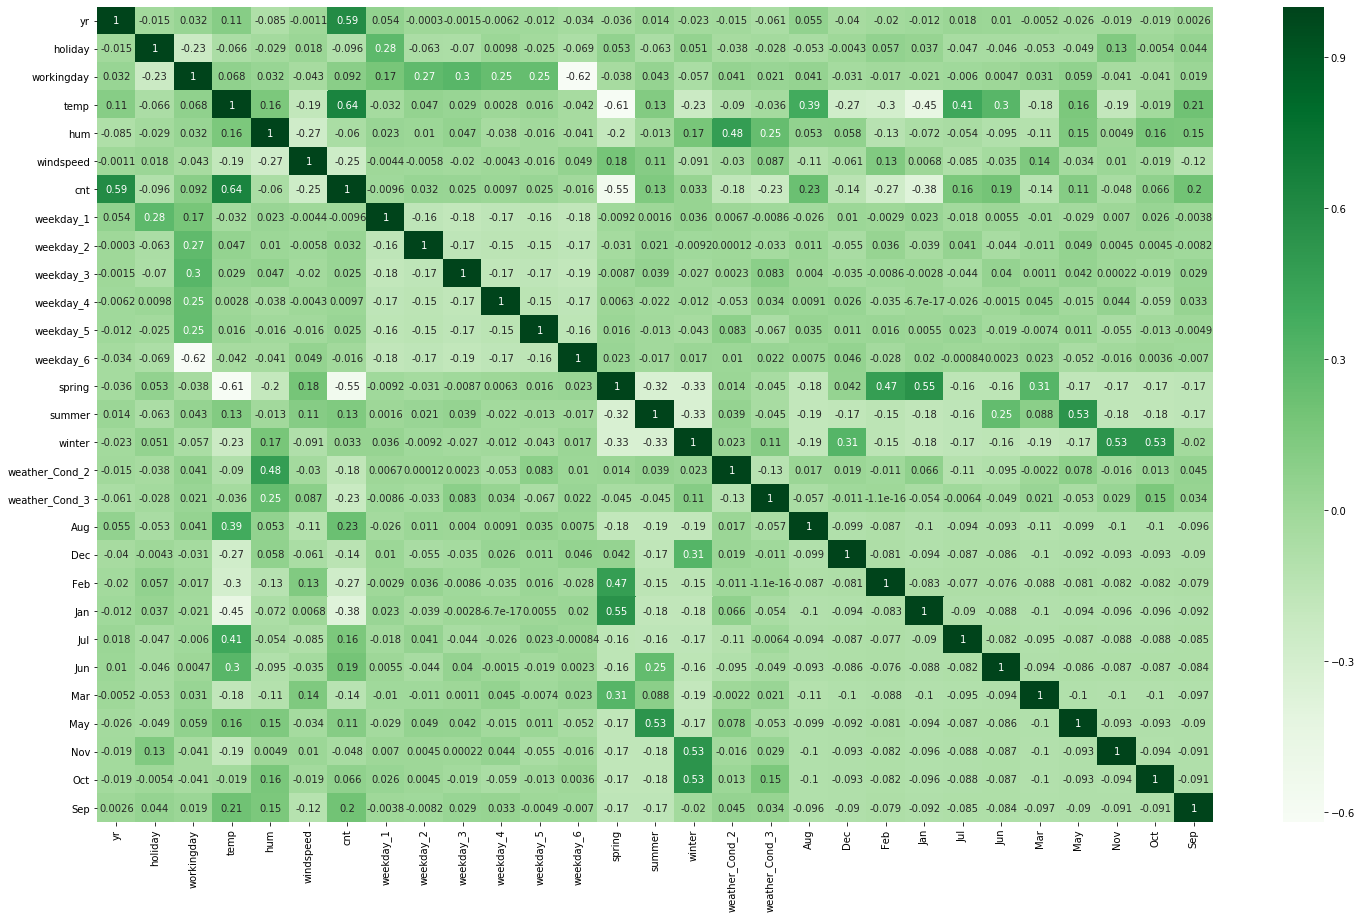

In [41]:
plt.subplots(figsize = (25,15))
sns.heatmap(df_train.corr(),cmap = 'Greens',annot= True)
plt.show()

In [42]:
# Split the df_train into X_train and y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
X_train.shape

(510, 28)

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_1', False, 7),
 ('weekday_2', False, 8),
 ('weekday_3', False, 11),
 ('weekday_4', False, 13),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('weather_Cond_2', True, 1),
 ('weather_Cond_3', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 9),
 ('Sep', True, 1)]

In [46]:
columns = list(X_train.columns[rfe.support_])
columns

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'weekday_6',
 'spring',
 'summer',
 'winter',
 'weather_Cond_2',
 'weather_Cond_3',
 'Jan',
 'Jul',
 'Sep']

#### Building the model using statsmodel

##### Model 1

In [47]:
X_train_rfe = X_train[columns]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.34e-191
Time:                        22:36:05   Log-Likelihood:                 519.87
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2511      0.036      6.948      0.000       0.180       0.322
yr                 0.2305      0.008     28.805      0.000       0.215       0.246
holiday           -0.0585      0.027     -2.179      0.030      -0.111      -0.006
workingday         0.0435      0.012      3.780      0.000       0.021       0.066
temp               0.5099      0.034     14.850      0.000       0.442       0.577
hum               -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed         -0.1860      0.025     -7.303      0.000      -0.236      -0.136
weekday_6          0.0537      0.014      3.707      0.000       0.025       0.082
spring            -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer             0.0497      0.015      3.346      0.001       0.021       0.079
winter             0.0944      0.017      5.478      0.000       0.061       0.128
weather_Cond_2    -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weather_Cond_3    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
Jan               -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                0.0812      0.016      4.933      0.000       0.049       0.113
==============================================================================
Omnibus:                       66.343   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.557
Skew:                          -0.676   Prob(JB):                     8.29e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X_train_rfe1 = X_train_rfe.drop('const',axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,hum,29.41
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
7,spring,4.53
9,winter,3.48
8,summer,2.84
10,weather_Cond_2,2.29
0,yr,2.09
6,weekday_6,1.98


###### Observation : 
- R square value close to 0.85, it is observerd p-value for all the variables are below 0.05, hence they are assumed to be significant.
- But is seen that hum has very high VIF hence it should be removed

###### Model 2

In [49]:
X_train_rfe.drop('hum',inplace = True, axis = 1)

In [50]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          7.42e-189
Time:                        22:36:05   Log-Likelihood:                 511.15
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.524      0.000       0.112       0.235
yr                 0.2344      0.008     29.017      0.000       0.218       0.250
holiday           -0.0562      0.027     -2.059      0.040      -0.110      -0.003
workingday         0.0465      0.012      3.982      0.000       0.024       0.069
temp               0.4729      0.034     14.035      0.000       0.407       0.539
windspeed         -0.1563      0.025     -6.293      0.000      -0.205      -0.108
weekday_6          0.0584      0.015      3.980      0.000       0.030       0.087
spring            -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer             0.0434      0.015      2.890      0.004       0.014       0.073
winter             0.0797      0.017      4.650      0.000       0.046       0.113
weather_Cond_2    -0.0826      0.009     -9.593      0.000      -0.100      -0.066
weather_Cond_3    -0.2917      0.024    -12.026      0.000      -0.339      -0.244
Jan               -0.0390      0.018     -2.215      0.027      -0.074      -0.004
Jul               -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sep                0.0753      0.017      4.521      0.000       0.043       0.108
==============================================================================
Omnibus:                       67.962   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.082
Skew:                          -0.691   Prob(JB):                     8.62e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X_train_rfe1 = X_train_rfe.drop('const',axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
6,spring,3.08
7,summer,2.33
0,yr,2.08
8,winter,1.99
5,weekday_6,1.97
11,Jan,1.62
12,Jul,1.59


###### Observertion:
- R square value 0.843, it is observerd p-value for all the variables are below 0.05, hence they are assumed to be significant.
- temp has high VIF compared to other variables, but it will not be removed for next iteration as from the EDA analysis we found out that temp variable has high correlation with the target variable, hence it is considered to be important predictor.
- we remove next highest VIF value that is workingday 

##### Model 3

In [52]:
X_train_rfe.drop('workingday',inplace = True, axis = 1)      # holiday

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.22e-186
Time:                        22:36:05   Log-Likelihood:                 503.11
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -918.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2121      0.030      6.985      0.000       0.152       0.272
yr                 0.2346      0.008     28.627      0.000       0.219       0.251
holiday           -0.0939      0.026     -3.615      0.000      -0.145      -0.043
temp               0.4741      0.034     13.867      0.000       0.407       0.541
windspeed         -0.1571      0.025     -6.232      0.000      -0.207      -0.108
weekday_6          0.0201      0.011      1.788      0.074      -0.002       0.042
spring            -0.0613      0.021     -2.895      0.004      -0.103      -0.020
summer             0.0425      0.015      2.791      0.005       0.013       0.072
winter             0.0769      0.017      4.424      0.000       0.043       0.111
weather_Cond_2    -0.0808      0.009     -9.256      0.000      -0.098      -0.064
weather_Cond_3    -0.2869      0.025    -11.667      0.000      -0.335      -0.239
Jan               -0.0383      0.018     -2.146      0.032      -0.073      -0.003
Jul               -0.0512      0.019     -2.757      0.006      -0.088      -0.015
Sep                0.0760      0.017      4.497      0.000       0.043       0.109
==============================================================================
Omnibus:                       66.336   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.831
Skew:                          -0.715   Prob(JB):                     5.86e-32
Kurtosis:                       5.174   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X_train_rfe1 = X_train_rfe.drop('const',axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
5,spring,2.76
6,summer,2.23
0,yr,2.07
7,winter,1.80
10,Jan,1.61
11,Jul,1.59
8,weather_Cond_2,1.56
12,Sep,1.34


###### Observation :
- R square value 0.838, it is observerd p-value for all the variables except weekday_6 are below 0.05, hence remaining variables are assumed to be significant.
- It is observed that when workingday was dropped the R2 value has changed from 0.843 to 0.838, that indicates that was not a strong predictor. 
- weekday_6 has a p-value higher than 0.05 hence it would be removed in next iteration

##### Model 4

In [54]:
X_train_rfe.drop('weekday_6',inplace = True, axis = 1)    # jan

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          4.02e-187
Time:                        22:36:05   Log-Likelihood:                 501.47
No. Observations:                 510   AIC:                            -976.9
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.030      7.094      0.000       0.156       0.275
yr                 0.2342      0.008     28.523      0.000       0.218       0.250
holiday           -0.0973      0.026     -3.747      0.000      -0.148      -0.046
temp               0.4728      0.034     13.801      0.000       0.406       0.540
windspeed         -0.1550      0.025     -6.141      0.000      -0.205      -0.105
spring            -0.0615      0.021     -2.898      0.004      -0.103      -0.020
summer             0.0422      0.015      2.766      0.006       0.012       0.072
winter             0.0770      0.017      4.423      0.000       0.043       0.111
weather_Cond_2    -0.0807      0.009     -9.222      0.000      -0.098      -0.063
weather_Cond_3    -0.2864      0.025    -11.623      0.000      -0.335      -0.238
Jan               -0.0380      0.018     -2.125      0.034      -0.073      -0.003
Jul               -0.0507      0.019     -2.727      0.007      -0.087      -0.014
Sep                0.0762      0.017      4.499      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.987   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.142
Skew:                          -0.637   Prob(JB):                     2.74e-30
Kurtosis:                       5.187   Cond. No.                         17.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X_train_rfe1 = X_train_rfe.drop('const',axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.22
0,yr,2.07
6,winter,1.79
9,Jan,1.61
10,Jul,1.59
7,weather_Cond_2,1.56
11,Sep,1.34


###### Observation :
- R square value 0.837, it is observerd p-value for all the variables are below 0.05, hence they are assumed to be significant.
- R-square value did not change much after removing weekday_6, Now Jan will be removed from next model as it is correlated with temp and other important variables

##### Model 5

In [56]:
X_train_rfe.drop('Jan',inplace = True, axis = 1)     # Jul

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.42e-187
Time:                        22:36:05   Log-Likelihood:                 499.16
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1996      0.030      6.756      0.000       0.142       0.258
yr                 0.2335      0.008     28.360      0.000       0.217       0.250
holiday           -0.0980      0.026     -3.761      0.000      -0.149      -0.047
temp               0.4916      0.033     14.797      0.000       0.426       0.557
windspeed         -0.1480      0.025     -5.895      0.000      -0.197      -0.099
spring            -0.0669      0.021     -3.167      0.002      -0.108      -0.025
summer             0.0453      0.015      2.971      0.003       0.015       0.075
winter             0.0831      0.017      4.818      0.000       0.049       0.117
weather_Cond_2    -0.0816      0.009     -9.301      0.000      -0.099      -0.064
weather_Cond_3    -0.2851      0.025    -11.536      0.000      -0.334      -0.237
Jul               -0.0524      0.019     -2.811      0.005      -0.089      -0.016
Sep                0.0767      0.017      4.510      0.000       0.043       0.110
==============================================================================
Omnibus:                       59.300   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.198
Skew:                          -0.628   Prob(JB):                     4.39e-30
Kurtosis:                       5.187   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_train_rfe1 = X_train_rfe.drop('const',axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.21
4,spring,2.08
0,yr,2.07
6,winter,1.79
9,Jul,1.58
7,weather_Cond_2,1.55
10,Sep,1.34
8,weather_Cond_3,1.08


###### Observation : 
- R square value 0.836, it is observerd p-value for all the variables are below 0.05, hence they are assumed to be significant.
-  Holiday variable is considered to be removed for next model as from the EDA analysis it is observed that holiday is not that good predictor variable 

###### Model 6

In [58]:
X_train_rfe.drop('holiday',inplace = True, axis = 1)      # workingday  # holiday

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.57e-185
Time:                        22:36:05   Log-Likelihood:                 492.02
No. Observations:                 510   AIC:                            -962.0
Df Residuals:                     499   BIC:                            -915.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1976      0.030      6.601      0.000       0.139       0.256
yr                 0.2339      0.008     28.043      0.000       0.217       0.250
temp               0.4926      0.034     14.636      0.000       0.426       0.559
windspeed         -0.1498      0.025     -5.887      0.000      -0.200      -0.100
spring            -0.0693      0.021     -3.239      0.001      -0.111      -0.027
summer             0.0457      0.015      2.959      0.003       0.015       0.076
winter             0.0805      0.017      4.613      0.000       0.046       0.115
weather_Cond_2    -0.0799      0.009     -9.002      0.000      -0.097      -0.062
weather_Cond_3    -0.2810      0.025    -11.232      0.000      -0.330      -0.232
Jul               -0.0513      0.019     -2.717      0.007      -0.088      -0.014
Sep                0.0732      0.017      4.254      0.000       0.039       0.107
==============================================================================
Omnibus:                       70.282   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.887
Skew:                          -0.711   Prob(JB):                     2.87e-38
Kurtosis:                       5.473   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_train_rfe1 = X_train_rfe.drop('const',axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.21
0,yr,2.07
3,spring,2.07
5,winter,1.77
8,Jul,1.58
6,weather_Cond_2,1.54
9,Sep,1.33
7,weather_Cond_3,1.08


###### Observations :
- R square value 0.831, it is observerd p-value for all the variables are below 0.05, hence they are assumed to be significant.

###### Model 7

In [60]:
X_train_rfe.drop('Jul',inplace = True, axis = 1)      # workingday  # holiday

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     268.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.59e-185
Time:                        22:36:05   Log-Likelihood:                 488.28
No. Observations:                 510   AIC:                            -956.6
Df Residuals:                     500   BIC:                            -914.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1891      0.030      6.313      0.000       0.130       0.248
yr                 0.2344      0.008     27.941      0.000       0.218       0.251
temp               0.4795      0.034     14.304      0.000       0.414       0.545
windspeed         -0.1499      0.026     -5.856      0.000      -0.200      -0.100
spring            -0.0577      0.021     -2.734      0.006      -0.099      -0.016
summer             0.0611      0.014      4.223      0.000       0.033       0.089
winter             0.0931      0.017      5.499      0.000       0.060       0.126
weather_Cond_2    -0.0785      0.009     -8.805      0.000      -0.096      -0.061
weather_Cond_3    -0.2819      0.025    -11.196      0.000      -0.331      -0.232
Sep                0.0871      0.017      5.277      0.000       0.055       0.120
==============================================================================
Omnibus:                       73.859   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.731
Skew:                          -0.749   Prob(JB):                     9.37e-40
Kurtosis:                       5.493   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X_train_rfe1 = X_train_rfe.drop('const',axis = 1)

vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.84
0,yr,2.07
3,spring,1.98
4,summer,1.89
5,winter,1.62
6,weather_Cond_2,1.54
8,Sep,1.22
7,weather_Cond_3,1.08


###### observation :
- R square value 0.829 and Adj R2 is 0.826, it is observerd p-value for all the variables are below 0.05, hence they are assumed to be significant.
- And VIF of all the variables have been less than 5, henace less multicollinearity amoung the variables

## Step 4 : Residual Analysis 

###### To Check Normal Distribution of Residuals

In [62]:
y_train_rfe = lm.predict(X_train_rfe)

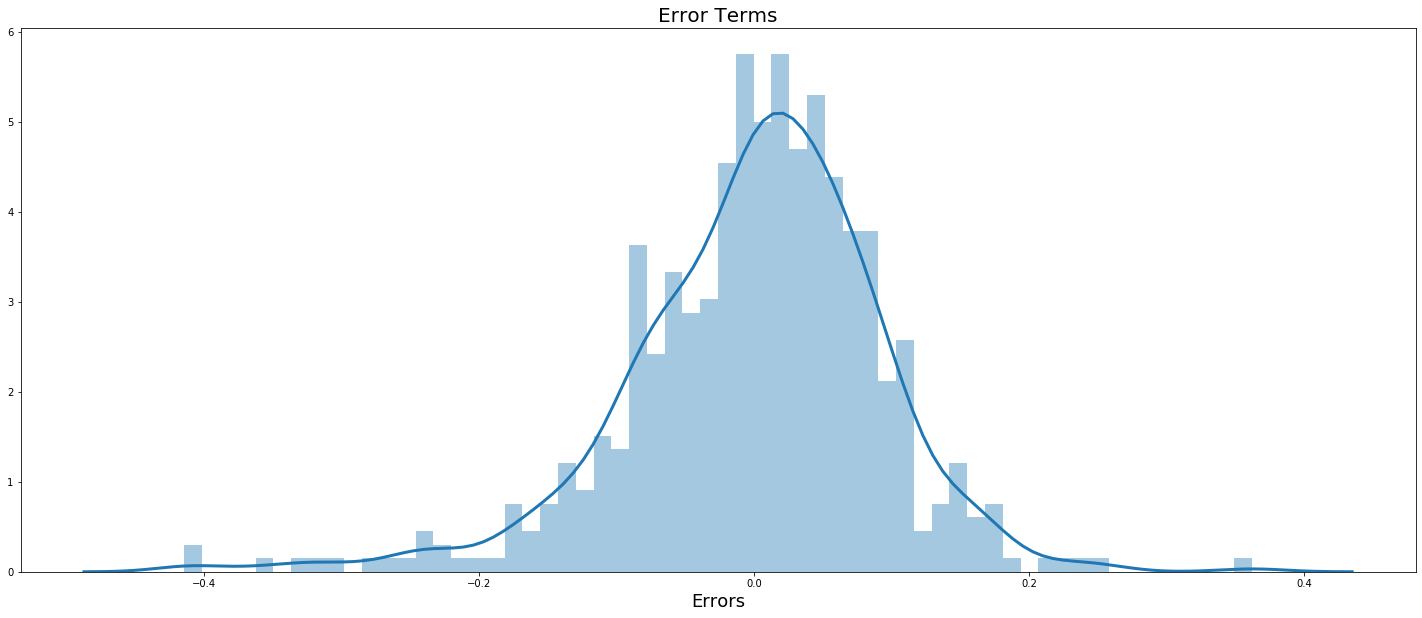

In [63]:
plt.subplots(figsize = (25,10))
sns.distplot((y_train - y_train_rfe), bins = 60, kde_kws = {'linewidth' : 3})
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [64]:
(y_train - y_train_rfe).mean()

-2.828674114113585e-15

###### Observation : Residuals are normally distributed about a mean of zero

##### To check the Homoscedasticity

In [65]:
x = y_train - y_train_rfe

<Figure size 432x288 with 0 Axes>

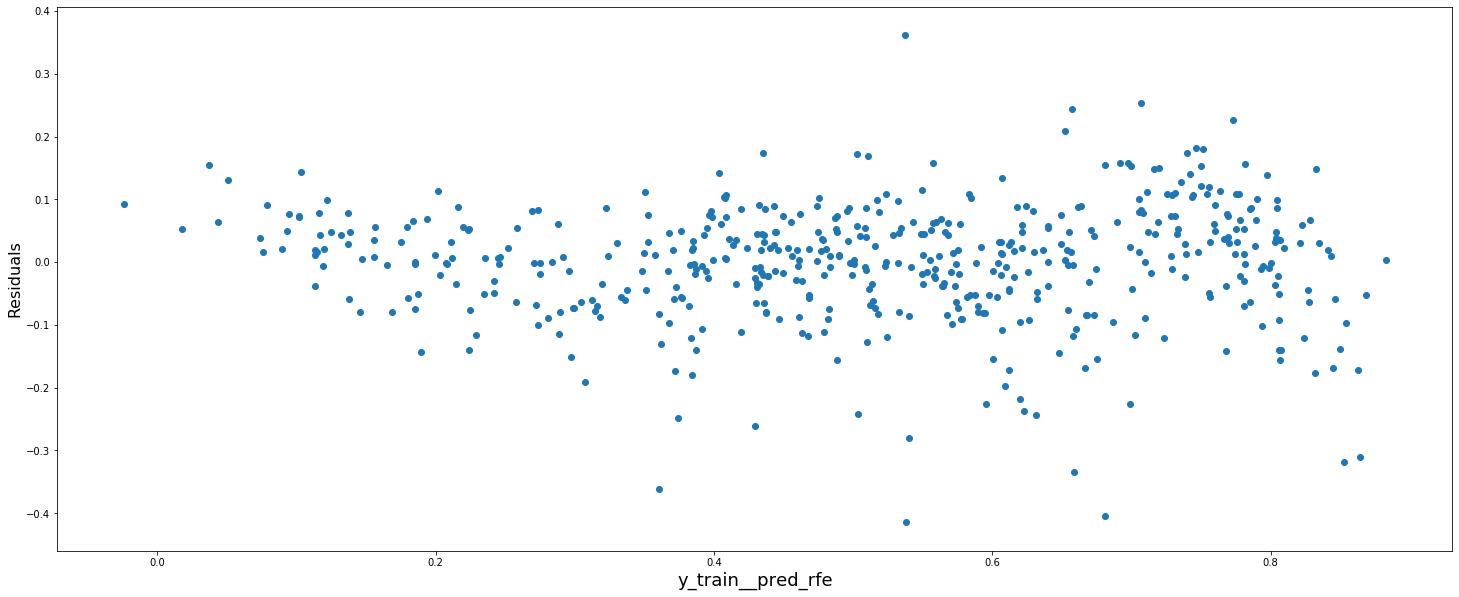

In [66]:
fig = plt.figure()
plt.subplots(figsize = (25,10))
plt.scatter(y_train_rfe,x)
fig.suptitle('y_train_pred_rfe vs Residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train__pred_rfe', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)
plt.show()

###### Observation : Residuals have Constant Variance hence it follows the principle of homogeneity

###### Independence of residuals

<Figure size 432x288 with 0 Axes>

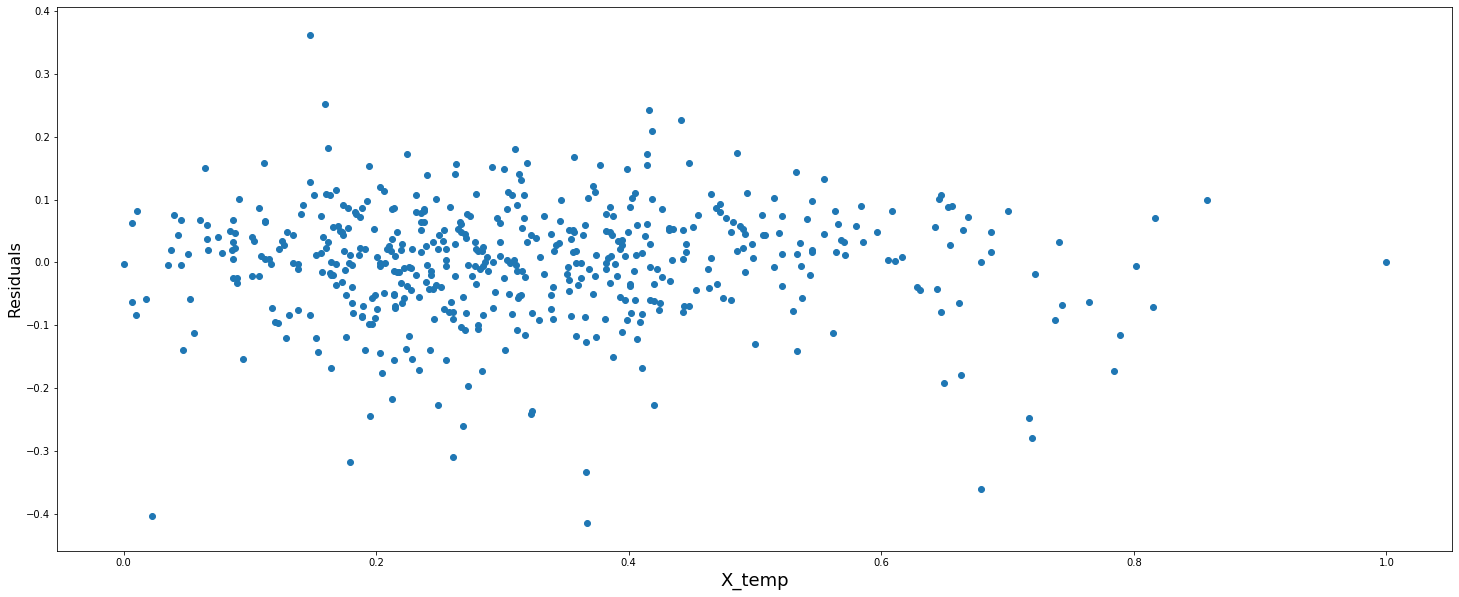

In [67]:
fig = plt.figure()
plt.subplots(figsize = (25,10))
plt.scatter(X_train_rfe.windspeed,x)
fig.suptitle('Input_X_train_temp vs Residuals', fontsize=20)              # Plot heading 
plt.xlabel('X_temp', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)
plt.show()

###### Observation : It is observed that there is no certain patterns, and hence residuals are independent of each other

## Step 5: Prediction and Evaluation

In [68]:
df_test[cols] = scaler.transform(df_test[cols])

In [69]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831662,0.657358,0.084376,0.692706,1,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901246,0.610161,0.153994,0.712034,0,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.512002,0.837696,0.334296,0.303382,0,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881495,0.437139,0.339750,0.547400,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817381,0.314303,0.537376,0.569029,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [70]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_1,weekday_2,weekday_3,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558966,0.638521,0.313450,0.520592,0.127854,0.164384,0.100457,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233659,0.148978,0.159911,0.218435,0.334692,0.371472,0.301297,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046794,0.261954,-0.042669,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354603,0.527257,0.198588,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558797,0.627782,0.299647,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759192,0.743972,0.403272,0.672745,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984503,1.002164,0.807507,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
y_test = df_test.cnt#pop('cnt')
X_test = df_test.loc[:, df_test.columns != 'cnt']

In [72]:
X_test_new = X_test[X_train_rfe1.columns]

In [73]:
X_test_new = sm.add_constant(X_test_new)

In [74]:
y_pred = lm.predict(X_test_new)

In [75]:
(y_test - y_pred).mean()

0.00018188868815970265

Text(0, 0.5, 'y_pred')

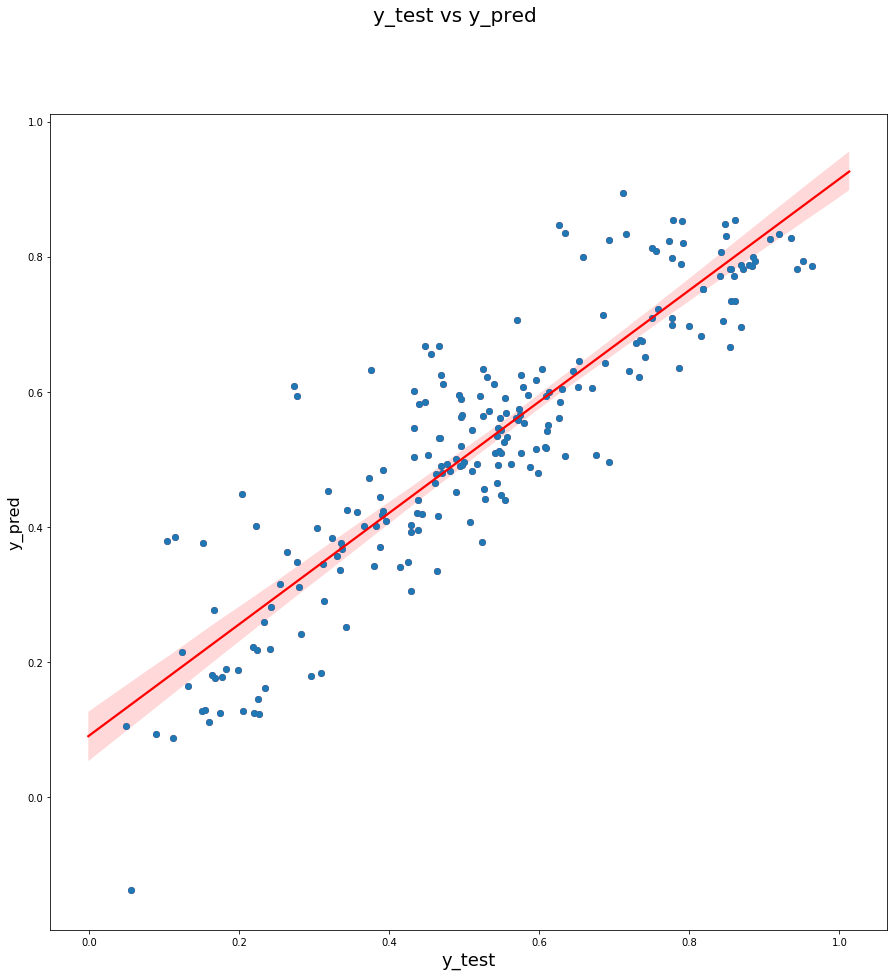

In [76]:
fig = plt.figure(figsize = (15,15))
sns.regplot(x=y_test, y=y_pred, color = 'Red')
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

###### R^2 score

In [77]:
r2 = r2_score(y_test, y_pred)
round(100*r2,2)

80.09

###### Adjusted R^2

In [78]:
n = X_test_new.shape[0]
p = X_test_new.shape[1]
adjusted_r2 = 1 - (((1 - r2) * (n - 1))/(n - p - 1))
round(100*adjusted_r2,2)

79.13

In [79]:
round(100*(r2 - adjusted_r2),2)

0.96

## Insights

#### Final Coefficients 

- const           : 0.1891
- yr              : 0.2344
- temp            : 0.4795
- windspeed       : -0.1499
- spring          : -0.0577
- summer          : 0.0611
- winter          : 0.0931
- weather_Cond_2  : -0.0785
- weather_Cond_3  : -0.2819
- Sep             : 0.0871

#### Final Equation is given by : 

- cnt = 0.1891 + (yr * 0.2344) + (temp * 0.4795) - (windspeed * 0.1499) - (spring * 0.0577) + (summer * 0.0611) + (winter * 0.0931) - (weather_Cond_2 * 0.0785 ) - (weather_Cond_3 * 0.2819) + (Sep * 0.0871) 

##### Final Report : Performance

- Train R-square     : 0.829 
- Train Adj R-square : 0.826 
- Test R-square      : 0.809 
- Test Adj R-square  : 0.791

###### This seems to really good model based on performance on test data

###### As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) : A coefficient value of ‘0.4795’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4795 units.

- weather_Cond_3 : A coefficient value of ‘-0.2819’ indicated that, w.r.t weather_Cond_1, a unit increase in weather_Cond_3 variable decreases the bike hire numbers by 0.2819 units.

- Year (yr) - A coefficient value of ‘0.2344’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2344 units.

######  It is suggested to consider these variables utmost importance while planning, to achive maximum Booking